## QOSF Cohort 1 Screen Task
__Author: Murshed SK__


### Task 1: State VectorStatevector simulation of quantum circuits

##### 1) Naive simulation using matrix multiplication

__The task is to create a vector of length $2^n$ which represents an $n$-qubit quantum state, and the matrix representation of the $X$, $H$, and $CNOT$ gates.__

In [115]:
# import necessary libraries for this task
import numpy as np
import time
import matplotlib.pyplot as plt
from functools import reduce

In [116]:
# create n-qubit quantum state
def create_qubit_state(n):
    """
    Create a random n-qubit quantum state.
    Returns a normalized vector of length 2^n.
    """
    state_vector = np.random.rand(2**n) + 1j * np.random.rand(2**n)
    return state_vector / np.linalg.norm(state)

# Create matrix representation of X, H, and CNOT gate
def X_gate():
    """Return the matrix for the X (NOT) gate."""
    return np.array([[0, 1], [1, 0]])

def H_gate():
    """Return the matrix for the H (Hadamard) gate."""
    return np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def CNOT_gate():
    """Return the matrix for the CNOT gate."""
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]])

__Define a quantum circuit consisting of these gates and apply the gates sequentially to the state vector via matrix multiplication.__

In [117]:
def apply_gate(gate, state_vector):
    """Apply a gate to a quantum state."""
    return np.dot(gate, state_vector)
    
# Matrix-based simulation: Apply the gates to the quantum state vector
def apply_single_qubit_gate_matrix(gate, state_vector, target_qubit, num_qubits):
    """Apply a single-qubit gate to a specific qubit in a state vector."""
    # Create identity matrices for other qubits
    gates = [np.eye(2) for _ in range(num_qubits)]
    gates[target_qubit] = gate
    
    # Calculate the tensor product (Kronecker product) of all gates
    full_gate = gates[0]
    for g in gates[1:]:
        full_gate = np.kron(full_gate, g)
    
    # Apply the gate to the state vector
    return np.dot(full_gate, state_vector)

In [118]:
# Example usage
if __name__ == "__main__":
    # Create a 3-qubit quantum state
    num_qubits = 3
    state = create_qubit_state(num_qubits)
    print("Initial state:")
    print(state)
    print()

    # Apply X gate to the first qubit
    x_state = apply_single_qubit_gate(X_gate(), state, 0, num_qubits)
    print("After X gate on first qubit:")
    print(x_state)
    print()

    # Apply H gate to the second qubit
    h_state = apply_single_qubit_gate(H_gate(), state, 1, num_qubits)
    print("After H gate on second qubit:")
    print(h_state)
    print()

    # Apply CNOT gate (control: first qubit, target: second qubit)
    cnot_state = apply_gate(np.kron(CNOT_gate(), np.eye(2)), state)
    print("After CNOT gate on first two qubits:")
    print(cnot_state)
    print()

Initial state:
[0.29842621+0.03402505j 0.1503698 +0.29687532j 0.23183534+0.33966999j
 0.14782625+0.27943086j 0.0626444 +0.09664578j 0.35969376+0.25712334j
 0.18464258+0.2320569j  0.13916049+0.28436745j]

After X gate on first qubit:
[0.0626444 +0.09664578j 0.35969376+0.25712334j 0.18464258+0.2320569j
 0.13916049+0.28436745j 0.29842621+0.03402505j 0.1503698 +0.29687532j
 0.23183534+0.33966999j 0.14782625+0.27943086j]

After H gate on second qubit:
[ 0.37495154+0.2642423j   0.21085645+0.40751001j  0.04708685-0.21612361j
  0.00179856+0.0123351j   0.1748583 +0.23242789j  0.35274322+0.38289181j
 -0.08626575-0.09575012j  0.15594057-0.0192645j ]

After CNOT gate on first two qubits:
[0.29842621+0.03402505j 0.1503698 +0.29687532j 0.23183534+0.33966999j
 0.14782625+0.27943086j 0.18464258+0.2320569j  0.13916049+0.28436745j
 0.0626444 +0.09664578j 0.35969376+0.25712334j]



In [119]:
# Define the initial state vector for 3-qubit system (|000>)
state_vector = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# Create the circuit sequence
# 1. Apply Hadamard gate to the first qubit
state_vector = apply_single_qubit_gate(H_gate(), state_vector, 0, 3)

# 2. Apply X (NOT) gate to the second qubit
state_vector = apply_single_qubit_gate(X_gate(), state_vector, 1, 3)

# 3. Apply CNOT gate (control: first qubit, target: second qubit)
# CNOT operates on two qubits, so we need to extend it to the 3-qubit system
state_vector = np.dot(np.kron(CNOT_gate(), np.eye(2)), state_vector)

# Print the final state vector
print("Final state vector after applying the gates:")
print(state_vector)

# Optionally, compute the probabilities (square of the absolute value of each element)
probabilities = np.abs(state_vector)**2

# Print the probability distribution
print("\nProbability distribution of the final state:")
for i, prob in enumerate(probabilities):
    binary_state = format(i, f'0{3}b')  # 3 bits for 3 qubits
    print(f"State |{binary_state}>: Probability = {prob:.4f}")


Final state vector after applying the gates:
[0.         0.         0.70710678 0.         0.70710678 0.
 0.         0.        ]

Probability distribution of the final state:
State |000>: Probability = 0.0000
State |001>: Probability = 0.0000
State |010>: Probability = 0.5000
State |011>: Probability = 0.0000
State |100>: Probability = 0.5000
State |101>: Probability = 0.0000
State |110>: Probability = 0.0000
State |111>: Probability = 0.0000


__Plot the runtime of your code as a function of the number of qubits.__

In [120]:
# Measure runtime for matrix-based simulation
def measure_runtime_matrix(n):
    qubit_sizes = range(3, n)  # Test for qubit sizes from 3 to n-1
    matrix_runtimes = []

    for n in qubit_sizes:
        start_time = time.time()

        # Create the initial state vector for n qubits (starting in |000...0>)
        state_vector = np.zeros(2**n)
        state_vector[0] = 1  # |000...0> state

        # Apply Hadamard gate to the first qubit
        state_vector = apply_single_qubit_gate_matrix(H_gate(), state_vector, 0, n)

        # Apply X (NOT) gate to the second qubit
        state_vector = apply_single_qubit_gate_matrix(X_gate(), state_vector, 1, n)

        # Apply CNOT gate (control: first qubit, target: second qubit)
        state_vector = np.dot(np.kron(CNOT_gate(), np.eye(2**(n-2))), state_vector)

        end_time = time.time()
        matrix_runtimes.append(end_time - start_time)

    return qubit_sizes, matrix_runtimes

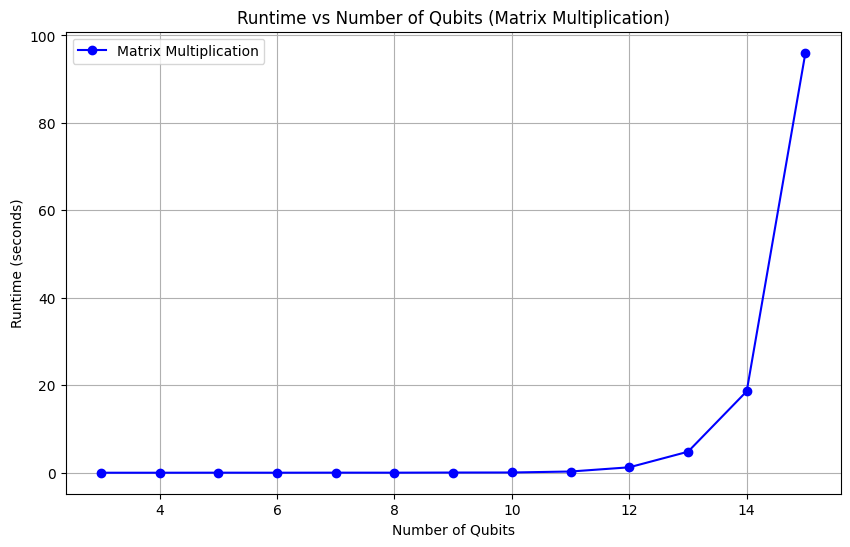

In [121]:
# Call the functions to get the runtime for the matrix method
qubit_sizes_matrix, matrix_runtimes = measure_runtime_matrix(16)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_sizes_matrix, matrix_runtimes, marker='o', color='blue', label="Matrix Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Number of Qubits (Matrix Multiplication)")
plt.grid(True)
plt.legend()
plt.show()

In [122]:
# Call the functions to get the runtime for the matrix method
qubit_sizes_matrix, matrix_runtimes = measure_runtime_matrix(17)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_sizes_matrix, matrix_runtimes, marker='o', label="Matrix Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Number of Qubits (Matrix Multiplication)")
plt.grid(True)
plt.legend()
plt.show()

MemoryError: Unable to allocate 32.0 GiB for an array with shape (32768, 2, 32768, 2) and data type float64

__How many qubits can you simulate this way?__

From the about two code cell:

If the `number of qubit` $>=16$, the output shows 

__```MemoryError: Unable to allocate 32.0 GiB for an array with shape (32768, 2, 32768, 2) and data type float64```__

And for upto `number of qubit` $=15$, we are getting a nice graph. 

Therefore, $15$ qubits can be simulated in this way.

##### 2) Advanced simulation using tensor multiplication


__Define a quantum circuit consisting of the 1- and 2-qubit matrix representations of X, H, CNOT (same as above) and apply them sequentially to the quantum state tensor via tensor multiplication.__

In [123]:
#The code for gates and quantum circuit is already written in the above code. So, it is not repeated here.

# Tensor-based simulation: Apply the gates to the quantum state tensor
def apply_single_qubit_gate_tensor(gate, state_tensor, target_qubit, num_qubits):
    """Apply a single-qubit gate to a specific qubit in a quantum state tensor."""
    # Create the full gate tensor with identity matrices for other qubits
    full_gate = [np.eye(2)] * num_qubits
    full_gate[target_qubit] = gate
    
    # Perform the tensor product (Kronecker product) across all qubits manually
    full_gate_tensor = reduce(np.kron, full_gate)
    
    # Apply the gate to the state tensor by reshaping the state_tensor and multiplying
    return np.tensordot(state_tensor.flatten(), full_gate_tensor, axes=(0, 0)).reshape(state_tensor.shape)

# Initialize a 3-qubit state tensor (|000>)
state_tensor = np.zeros((2, 2, 2))
state_tensor[0, 0, 0] = 1  # |000> state

# Apply the gates sequentially
# 1. Apply Hadamard gate to the first qubit
state_tensor = apply_single_qubit_gate_tensor(H_gate(), state_tensor, 0, 3)

# 2. Apply X (NOT) gate to the second qubit
state_tensor = apply_single_qubit_gate_tensor(X_gate(), state_tensor, 1, 3)

# 3. Apply CNOT gate (control: first qubit, target: second qubit)
# For applying the CNOT gate, we need to reshape the CNOT matrix to match the shape of the state tensor.
# The CNOT gate affects qubits 0 and 1, so we expand it to operate over qubits 0 and 1, leaving qubit 2 untouched.
cnot_tensor = np.reshape(CNOT_gate(), (2, 2, 2, 2))  # Reshape CNOT to 4D tensor for 2 qubits

# Apply the CNOT gate: The tensordot will contract the first two axes of the state tensor with the first two axes of the CNOT gate
state_tensor = np.tensordot(state_tensor, cnot_tensor, axes=([0, 1], [0, 1]))

# Print the final state tensor
print("Final state tensor:")
print(state_tensor)

# Optional: Visualize the final state as a flattened vector
final_state_vector = state_tensor.flatten()
print("\nFinal state vector (flattened):")
print(final_state_vector)

Final state tensor:
[[[0.         0.70710678]
  [0.70710678 0.        ]]

 [[0.         0.        ]
  [0.         0.        ]]]

Final state vector (flattened):
[0.         0.70710678 0.70710678 0.         0.         0.
 0.         0.        ]


__Plot the runtime of your code as a function of the number of qubits.__

In [124]:
# Measure runtime for tensor-based simulation
def measure_runtime_tensor(n):
    qubit_sizes = range(3, n)  # Test for qubit sizes from 3 to n-1
    tensor_runtimes = []

    for n in qubit_sizes:
        start_time = time.time()

        # Create the initial state tensor for n qubits (starting in |000...0>)
        state_tensor = np.zeros([2] * n)  # n-dimensional tensor
        state_tensor[tuple([0] * n)] = 1  # |000...0> state

        # Apply Hadamard gate to the first qubit
        state_tensor = apply_single_qubit_gate_tensor(H_gate(), state_tensor, 0, n)

        # Apply X (NOT) gate to the second qubit
        state_tensor = apply_single_qubit_gate_tensor(X_gate(), state_tensor, 1, n)

        # Apply CNOT gate (control: first qubit, target: second qubit)
        cnot_tensor = np.reshape(CNOT_gate(), (2, 2, 2, 2))  # Reshape CNOT to 4D tensor for 2 qubits
        state_tensor = np.tensordot(state_tensor, cnot_tensor, axes=([0, 1], [0, 1]))

        end_time = time.time()
        tensor_runtimes.append(end_time - start_time)

    return qubit_sizes, tensor_runtimes


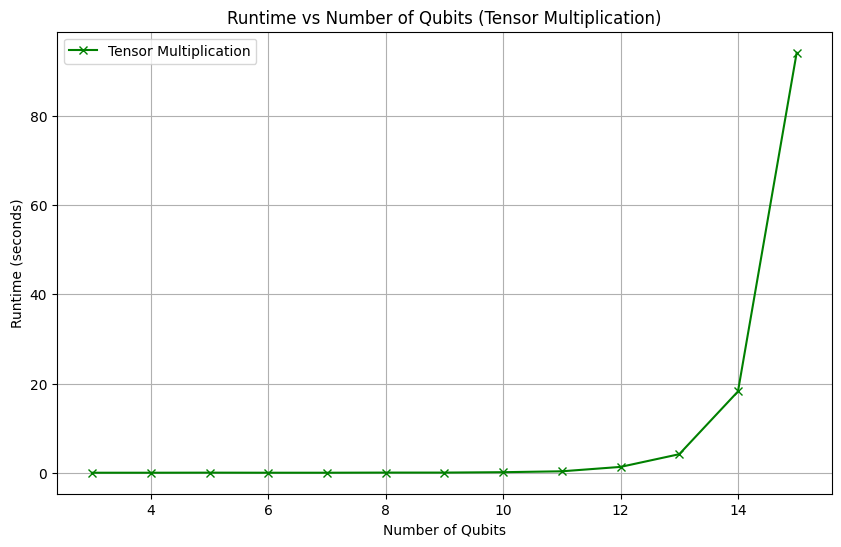

In [125]:
# Call the functions to get the runtime for the tensor method
qubit_sizes_tensor, tensor_runtimes = measure_runtime_tensor(16)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_sizes_tensor, tensor_runtimes, marker='x', color='green', label="Tensor Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Number of Qubits (Tensor Multiplication)")
plt.grid(True)
plt.legend()
plt.show()

In [127]:
# Call the functions to get the runtime for the tensor method
qubit_sizes_tensor, tensor_runtimes = measure_runtime_tensor(17)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_sizes_tensor, tensor_runtimes, marker='x', color='green', label="Tensor Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Number of Qubits (Tensor Multiplication)")
plt.grid(True)
plt.legend()
plt.show()

MemoryError: Unable to allocate 32.0 GiB for an array with shape (32768, 2, 32768, 2) and data type float64

__How many qubits can you simulate this way?__

From the about two code cell:

If the `number of qubit` $>=16$, the output shows 

__```MemoryError: Unable to allocate 32.0 GiB for an array with shape (32768, 2, 32768, 2) and data type float64```__

And for upto `number of qubit` $=15$, we are getting a nice graph. 

Therefore, $15$ qubits can be simulated in this way.

__Compare your results to subtask 1).__

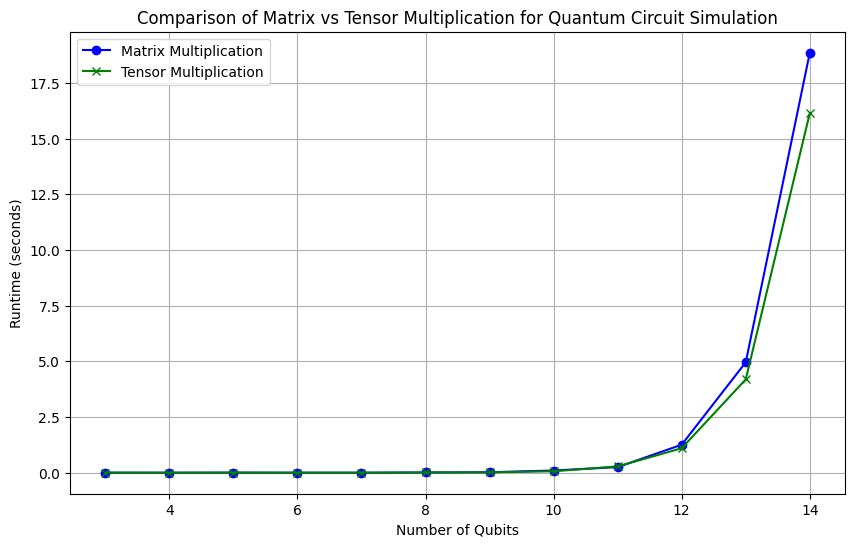

In [129]:
# Call the functions to get the runtime for both matrix and tensor methods
qubit_sizes_matrix, matrix_runtimes = measure_runtime_matrix(15)
qubit_sizes_tensor, tensor_runtimes = measure_runtime_tensor(15)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_sizes_matrix, matrix_runtimes, marker='o', color = 'blue', label="Matrix Multiplication")
plt.plot(qubit_sizes_tensor, tensor_runtimes, marker='x', color = 'green', label="Tensor Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Comparison of Matrix vs Tensor Multiplication for Quantum Circuit Simulation")
plt.grid(True)
plt.legend()
plt.show()

From both the above graphs, it is concluded that both the methods can be used to simulate the 15 qubits (atmost in my computer). It is also noticed that the runtime of matrix multiplication method takes some time than tensor multiplication method when the qubit size is $>10$.